In [31]:
import os
import numpy as np

In [25]:
results_path = '/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/Results/Evaluation'

# Model name
# 'vae_convT', 'conv_enc_dec_aux', 'conv_with_aux', 'deep_conv_enc_dec_aux', 'deep_conv_with_aux'
#'deeper_conv_enc_dec_aux', 'deeper_conv_with_aux'
model_name = 'vae_convT' 
preprocessing_method = 'masked_slice'

log_path = os.path.join(results_path, model_name, preprocessing_method)
experiments = os.listdir(log_path)

n = -25
experiments[n]


'20240503-1149_vae_convT_masked_slice_lr1.000e-03-e1500-bs8-gf_dim8-daFalse-f100__SEED_5_2Dslice__with_rotation_with_cs_skip_updated_ao_S10_decreased_interpolation_factor_cube_3'

In [27]:
experiment_path = os.path.join(log_path, experiments[n])
inputs_path = os.path.join(experiment_path, 'test/inputs')
outputs_path = os.path.join(experiment_path, 'test/outputs')

subject_id = 'MACDAVD_137_'

In [35]:
# Load input and output
input = np.load(os.path.join(inputs_path, subject_id + 'inputs.npy')).transpose(1,2,0,3,4)
output = np.load(os.path.join(outputs_path, subject_id + '_anomaly_scores.npy')).transpose(2,3,0,4,1)
input.shape, output.shape


((32, 32, 64, 24, 4), (32, 32, 64, 24, 4))

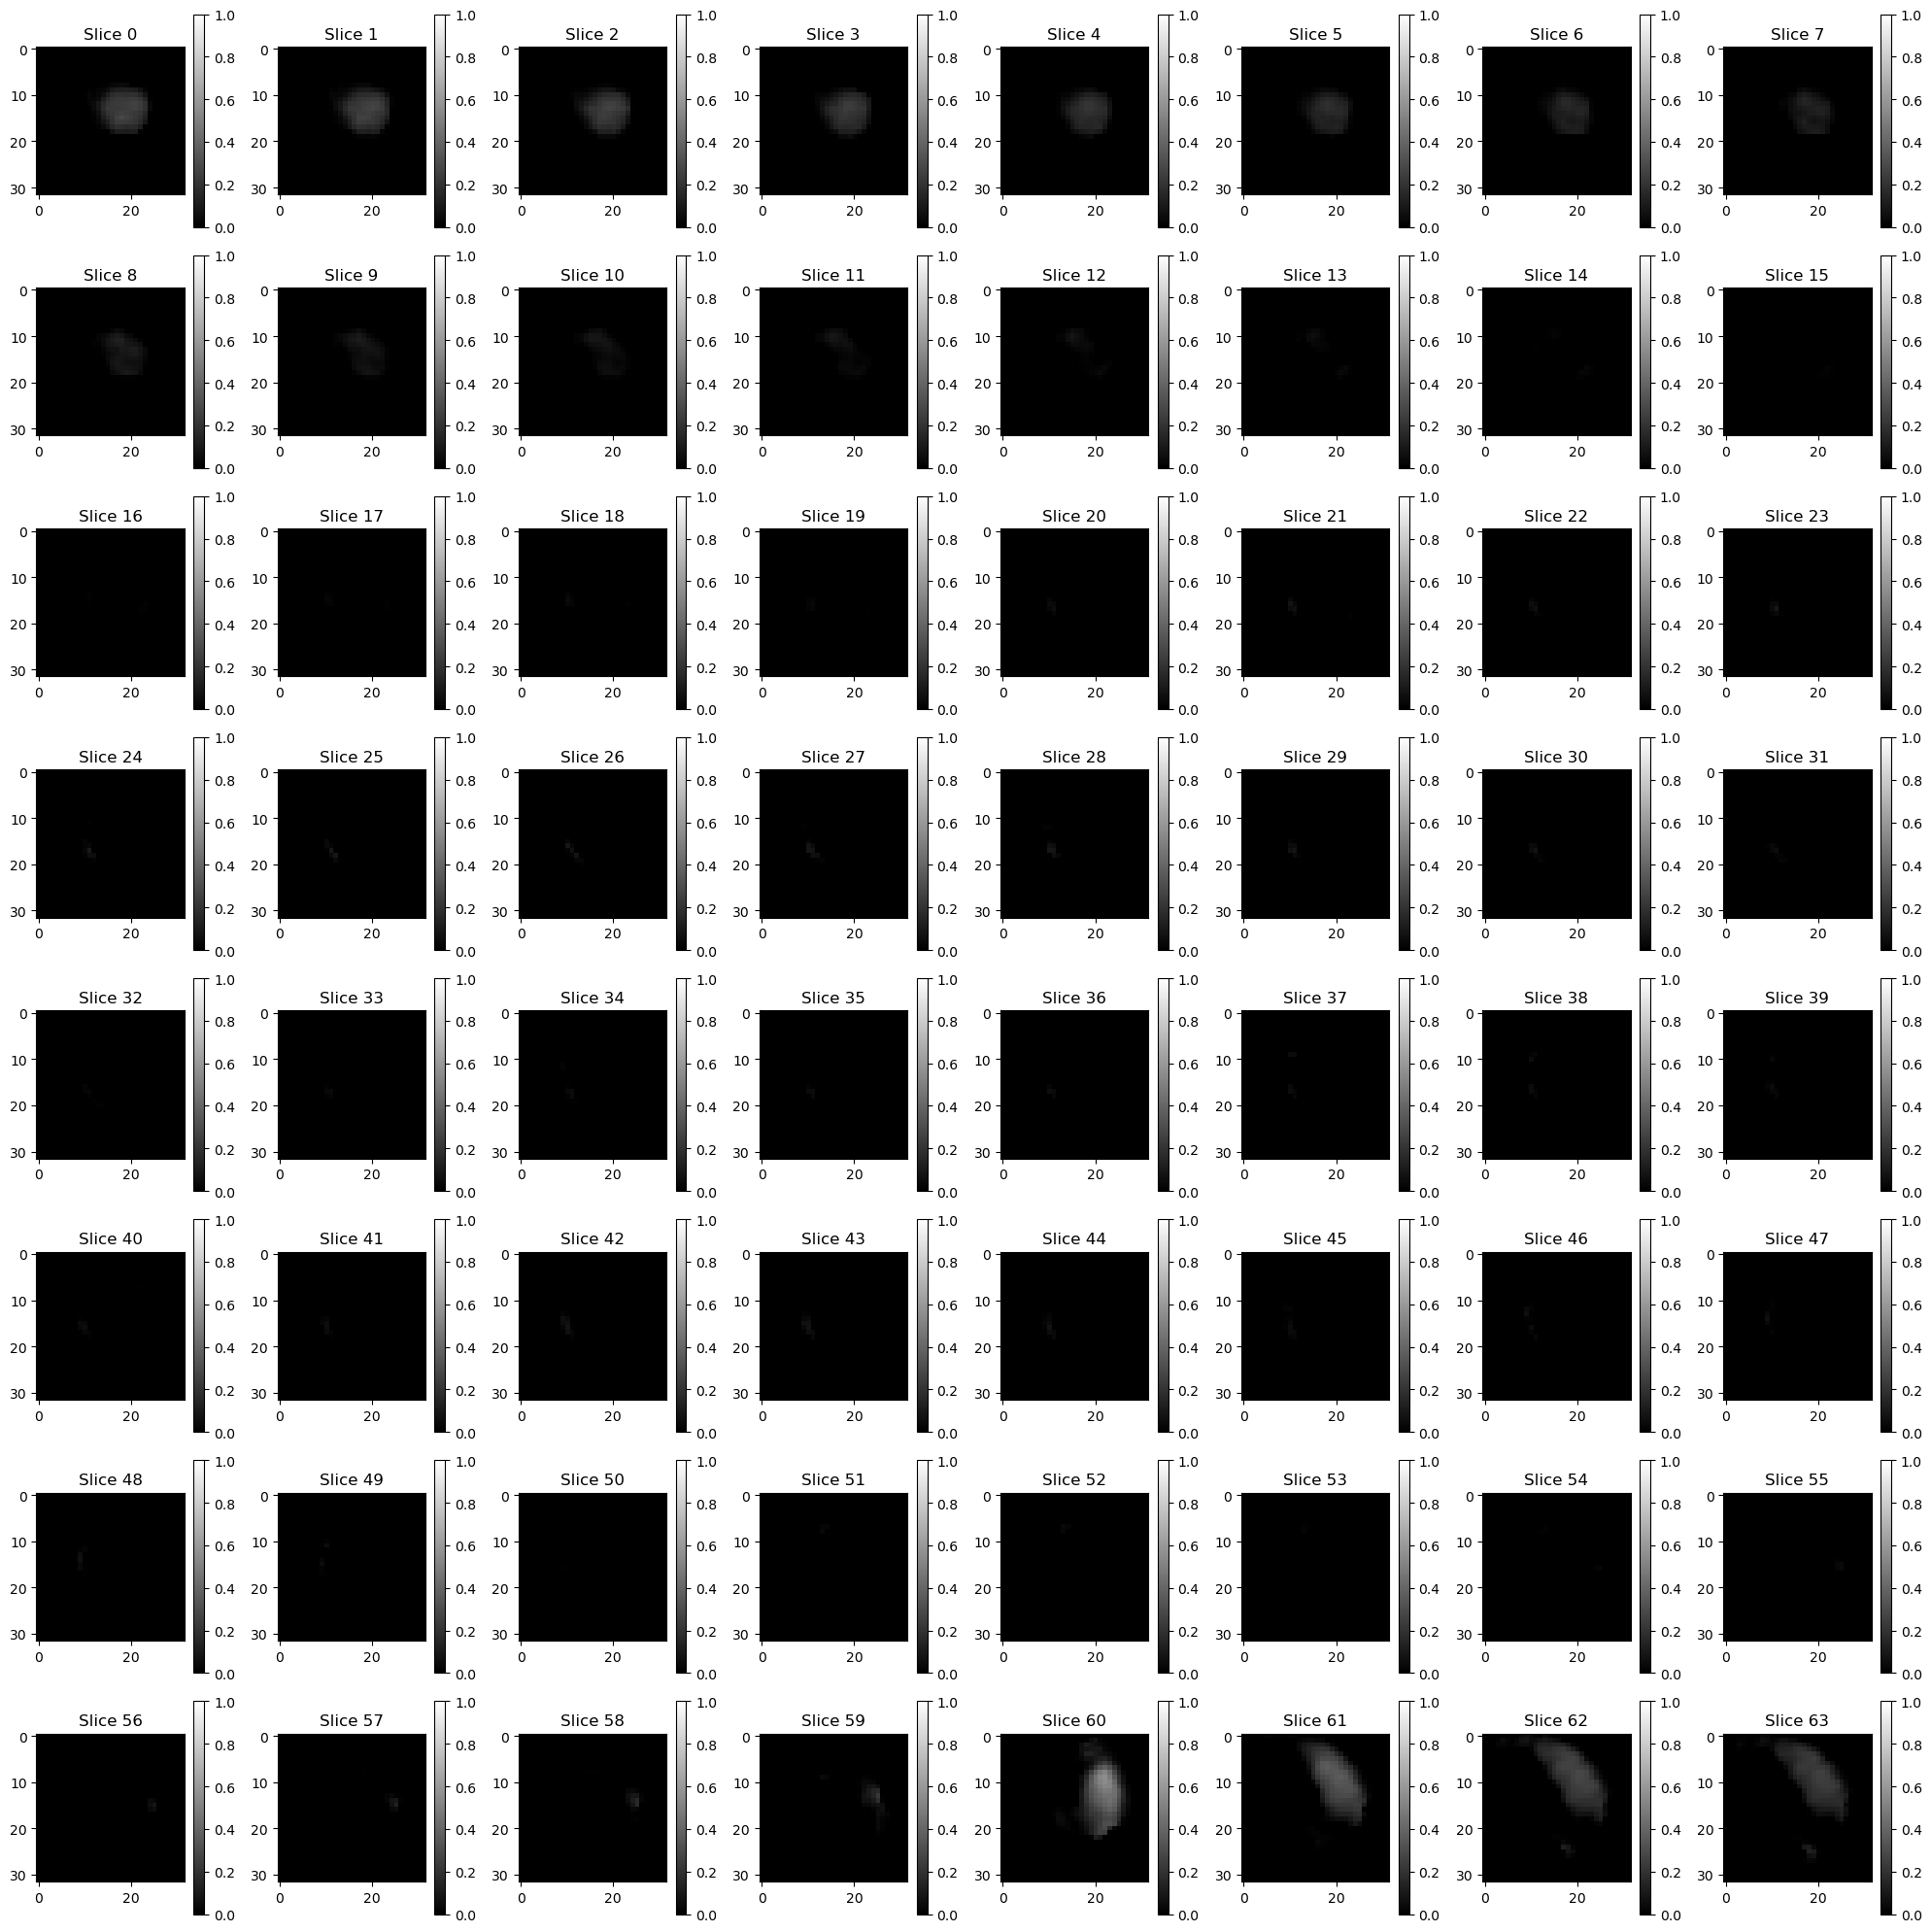

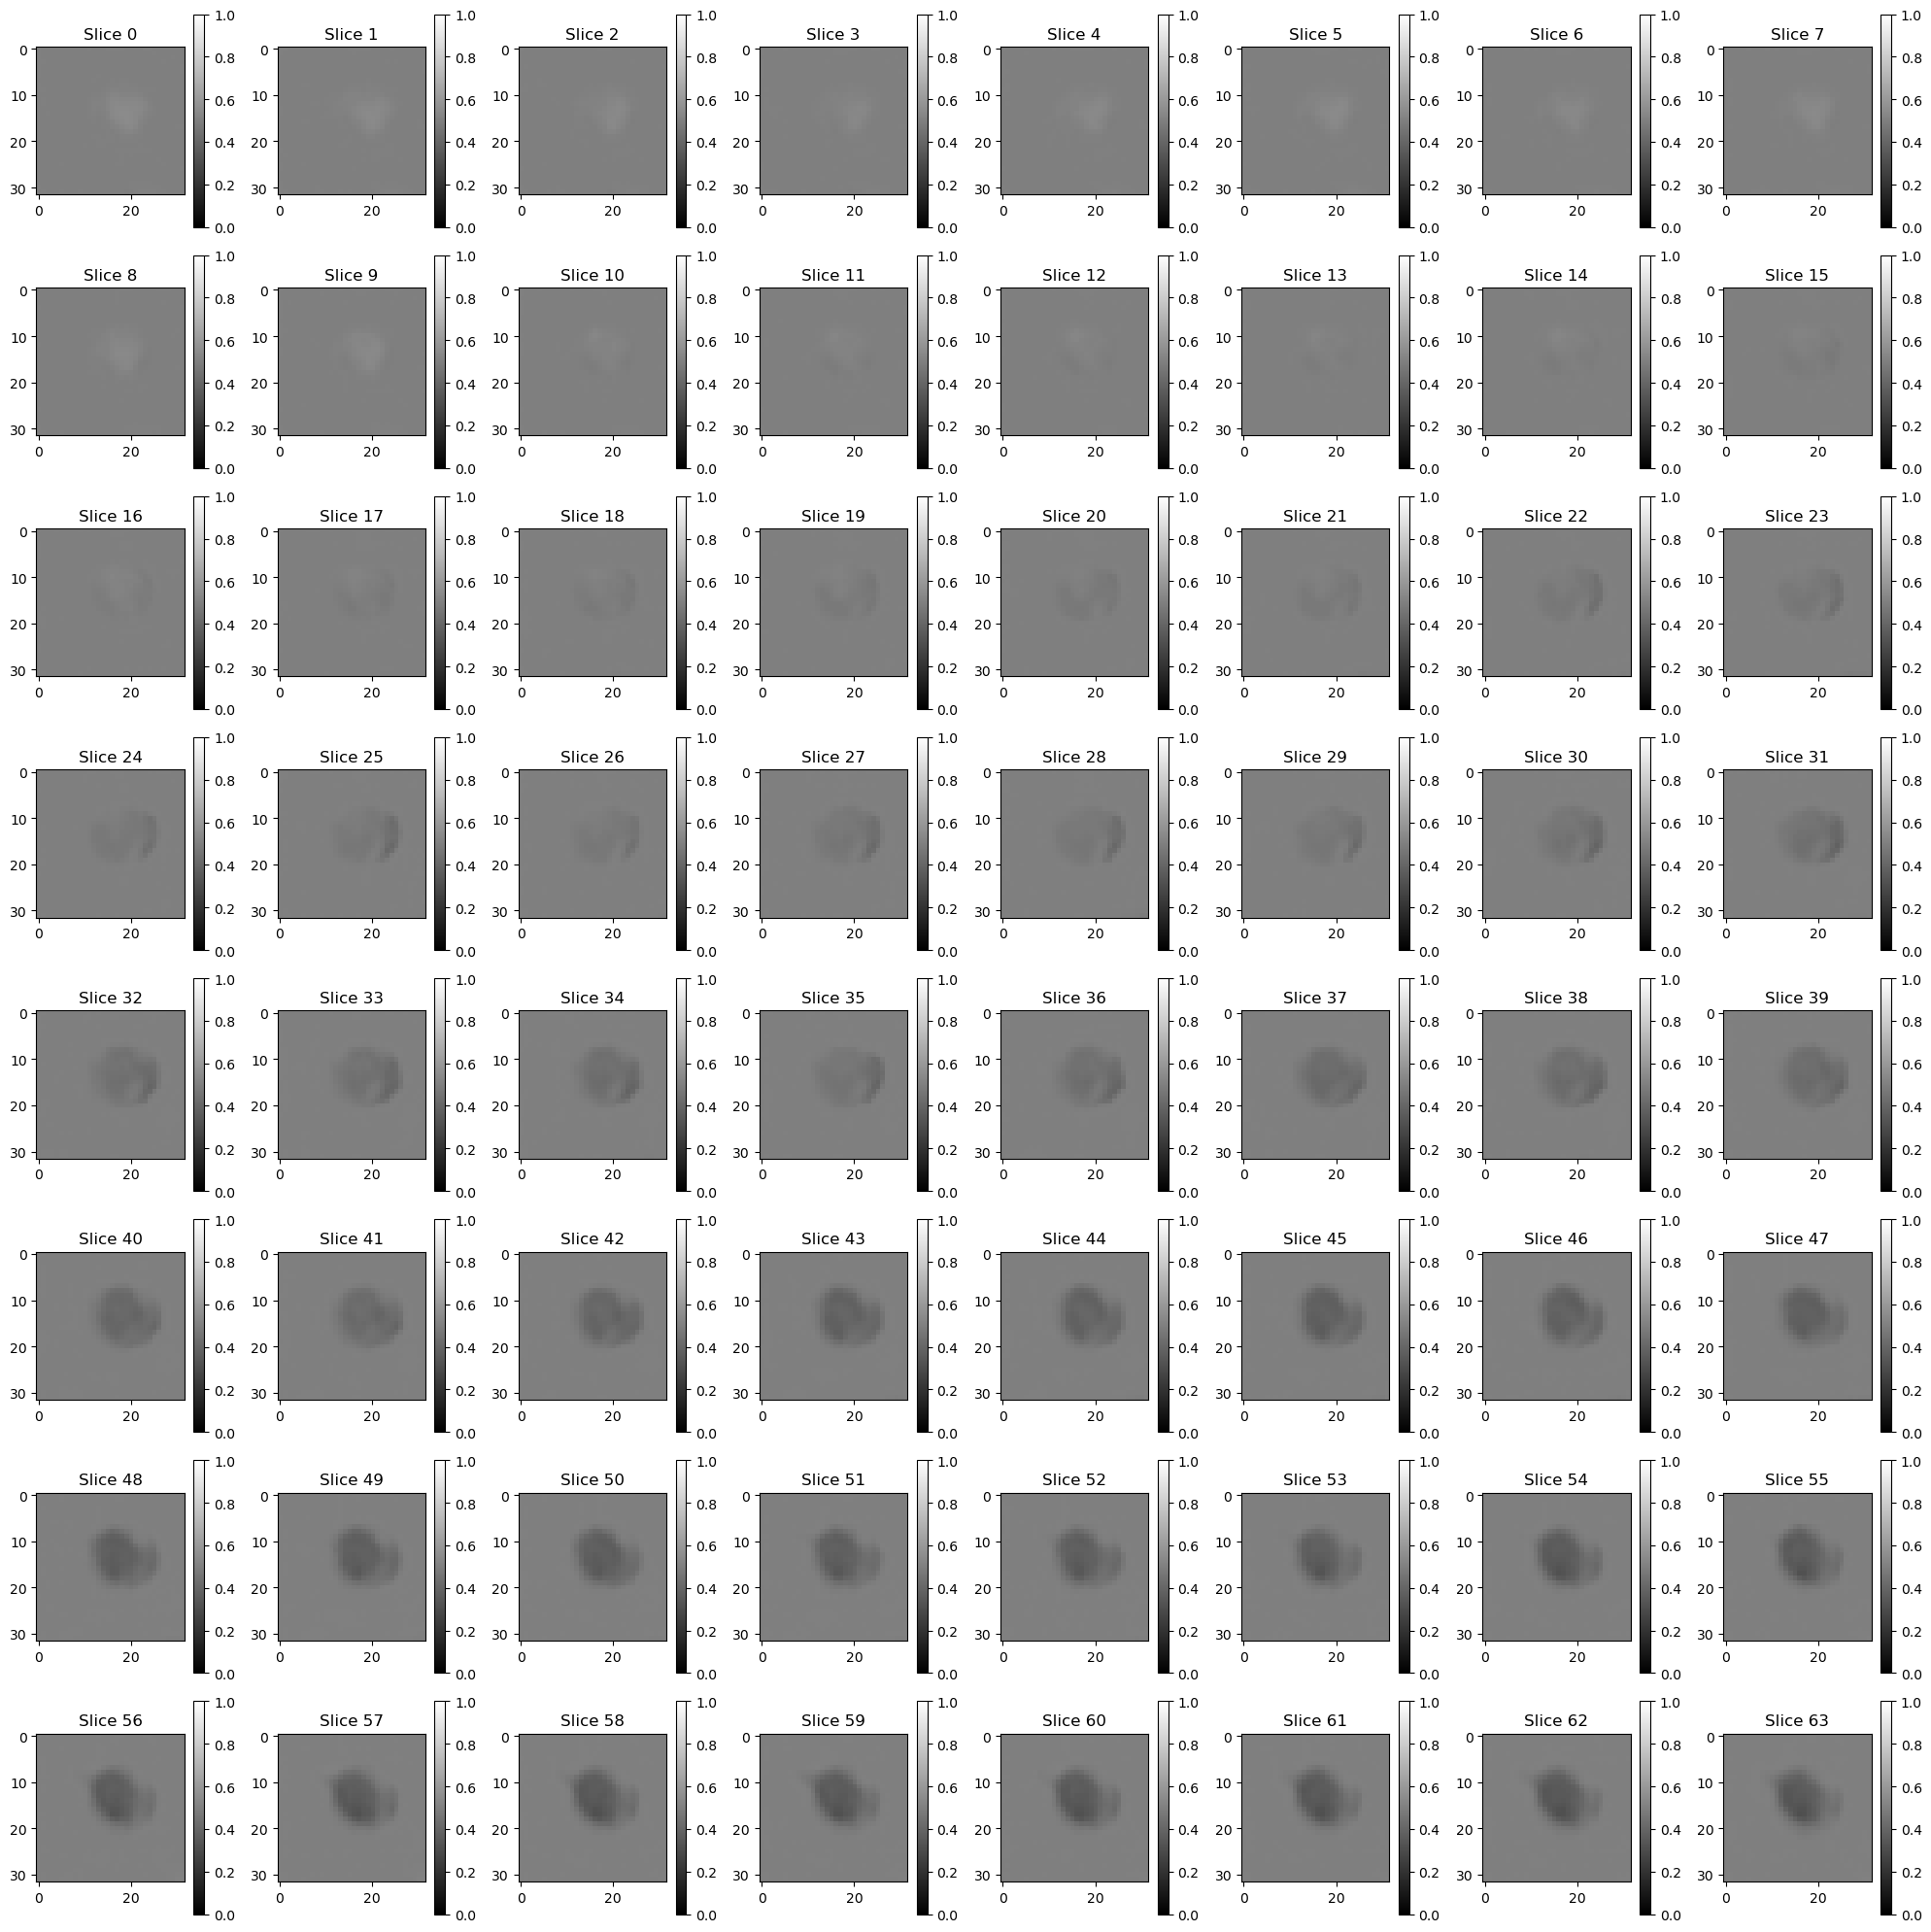

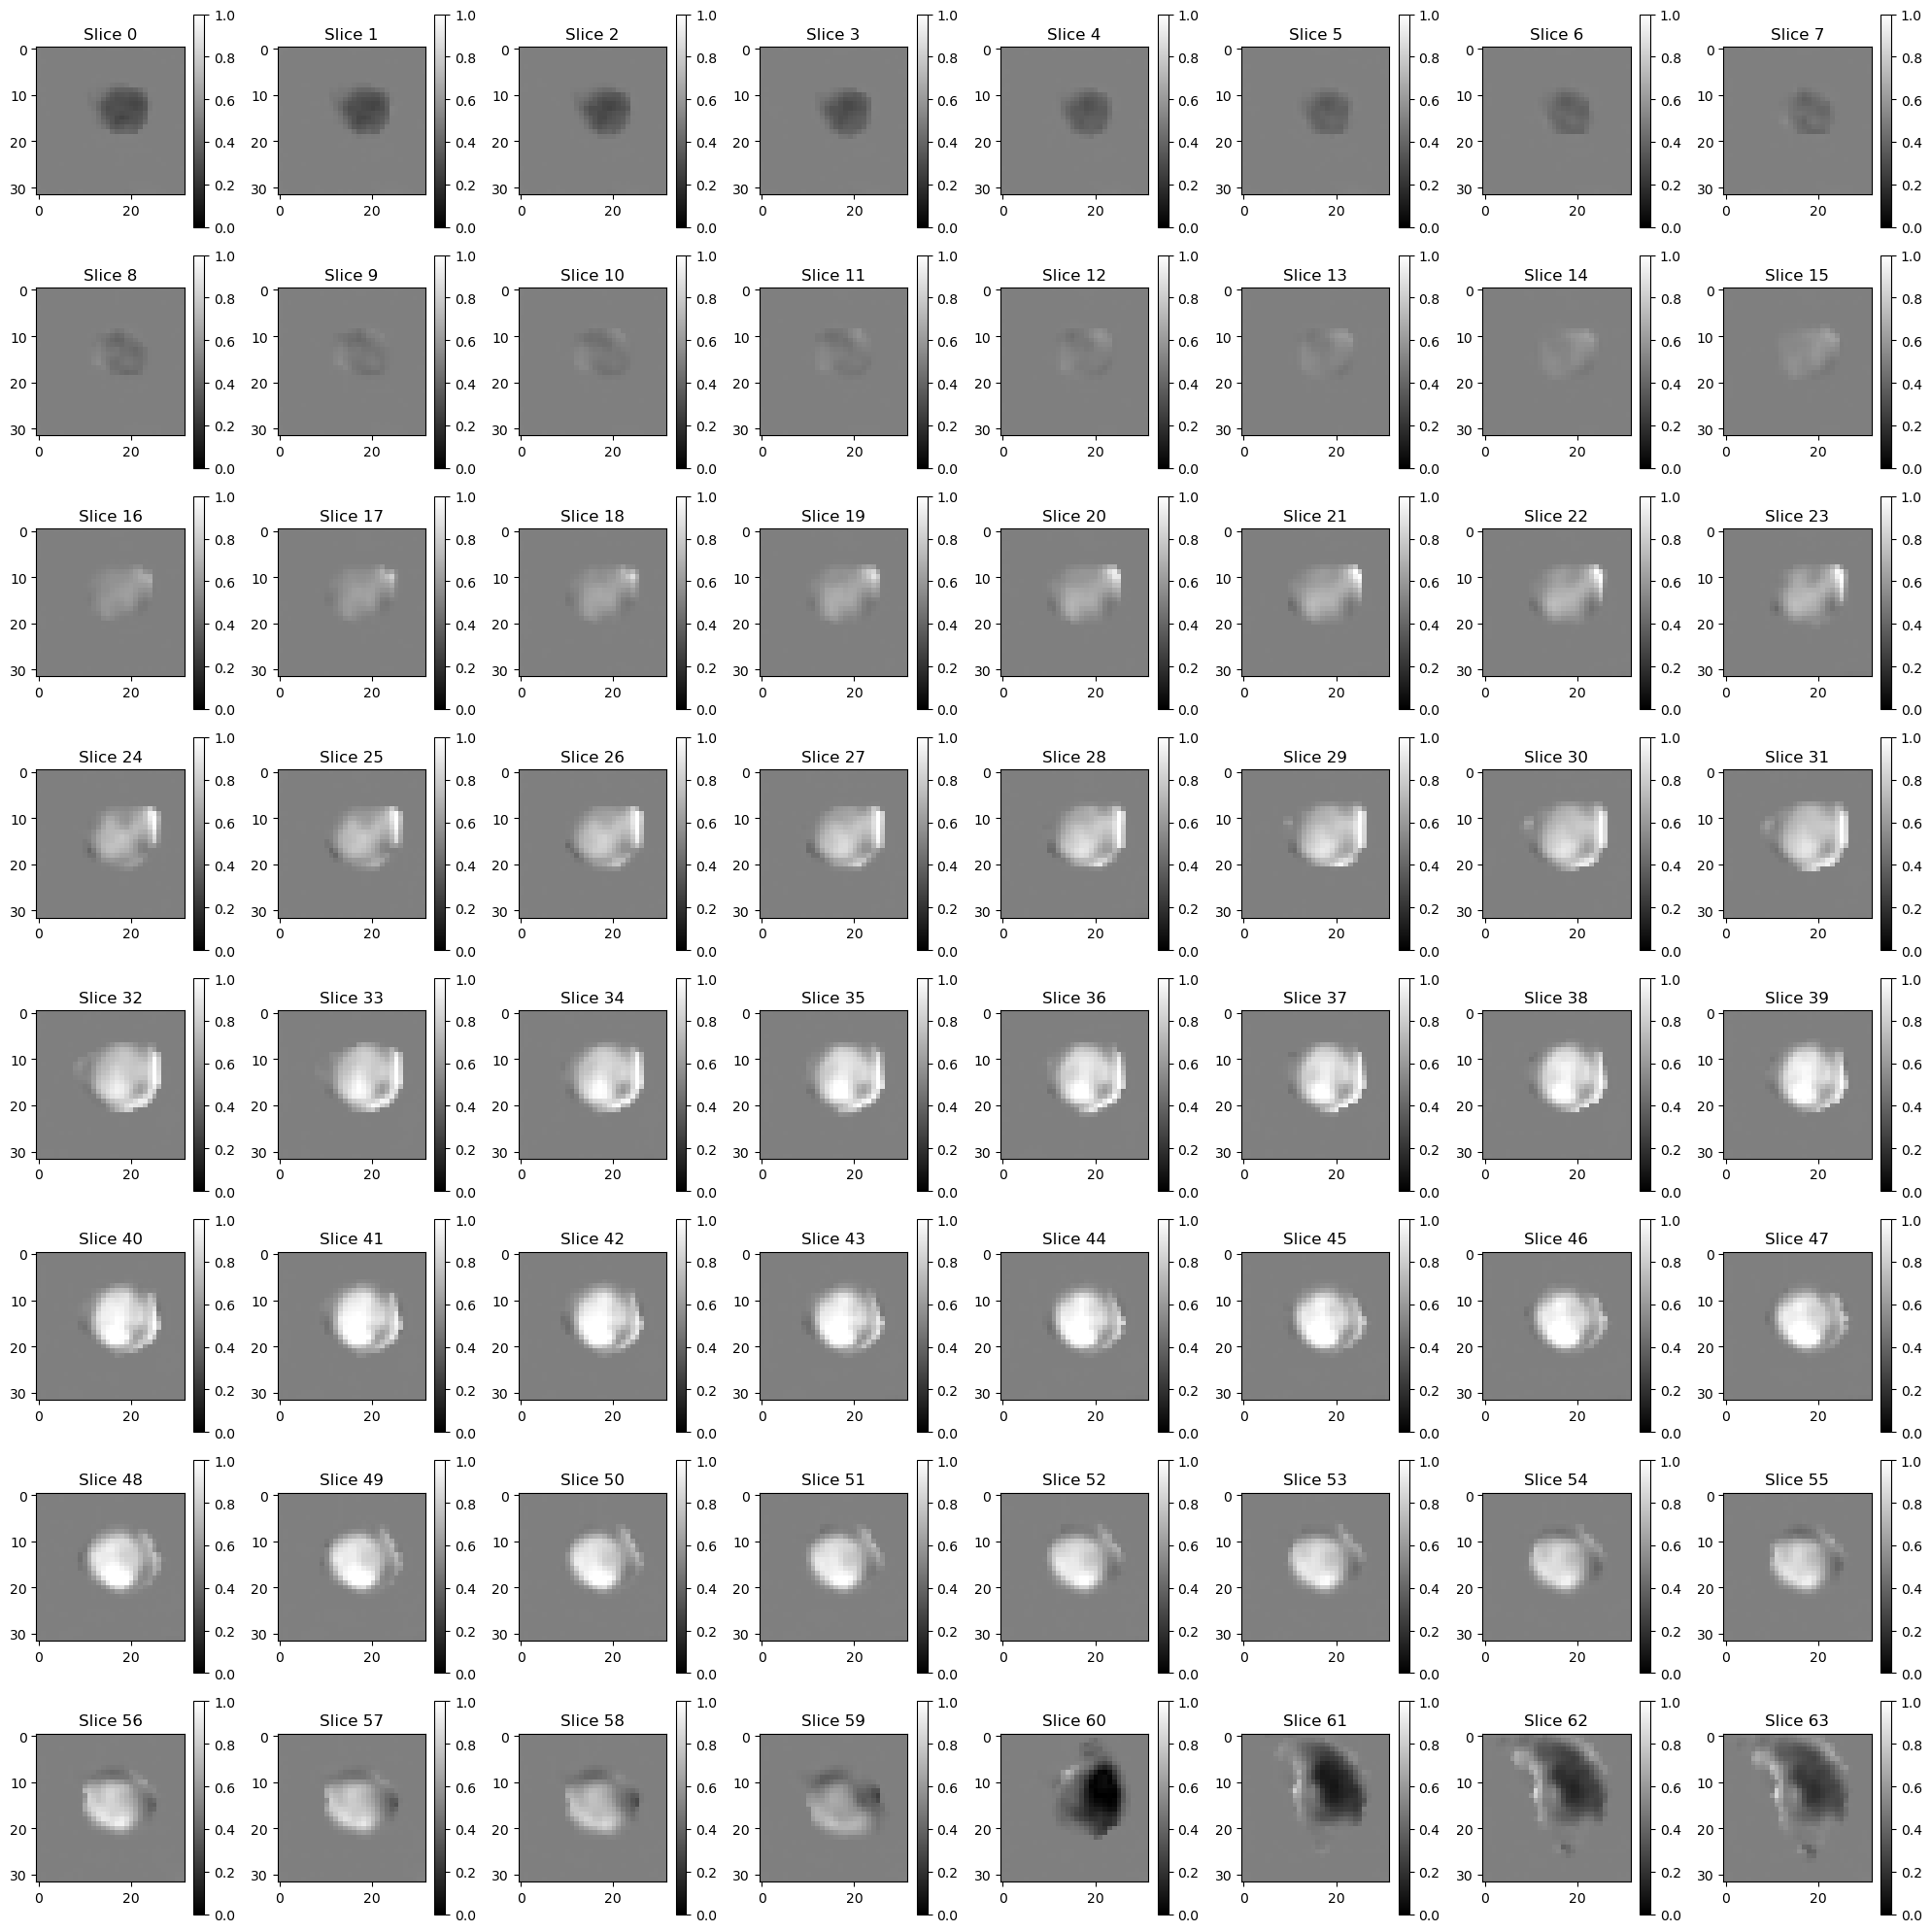

In [42]:
import matplotlib.pyplot as plt

# Set t_ and c
t_ = 4
c = 1

# Create figures and axes
fig_input, axs_input = plt.subplots(8, 8, figsize=(20, 20))
fig_output, axs_output = plt.subplots(8, 8, figsize=(20, 20))
fig_difference, axs_difference = plt.subplots(8, 8, figsize=(20, 20))

# Plot input, output, and difference for each slice
for i in range(64):
    row = i // 8
    col = i % 8
    
    im_input = axs_input[row, col].imshow(input[:, :, i, t_, c], cmap='gray', vmin=0, vmax=1)
    fig_input.colorbar(im_input, ax=axs_input[row, col])
    axs_input[row, col].set_title(f"Slice {i}")
    
    im_output = axs_output[row, col].imshow(output[:, :, i, t_, c], cmap='gray', vmin=0, vmax=1)
    fig_output.colorbar(im_output, ax=axs_output[row, col])
    axs_output[row, col].set_title(f"Slice {i}")
    
    im_diff = axs_difference[row, col].imshow(np.abs(input[:, :, i, t_, c] - output[:, :, i, t_, c]), cmap='gray', vmin=0, vmax=1)
    fig_difference.colorbar(im_diff, ax=axs_difference[row, col])
    axs_difference[row, col].set_title(f"Slice {i}")

# Adjust layout
fig_input.tight_layout()
fig_output.tight_layout()
fig_difference.tight_layout()

# Show the figures
plt.show()
